In [ ]:
Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.
Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.
Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?
Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?
Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?
Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?
Note:- We can use Wine quality dataset and Student Performance Data set as per the discussion in lecture.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

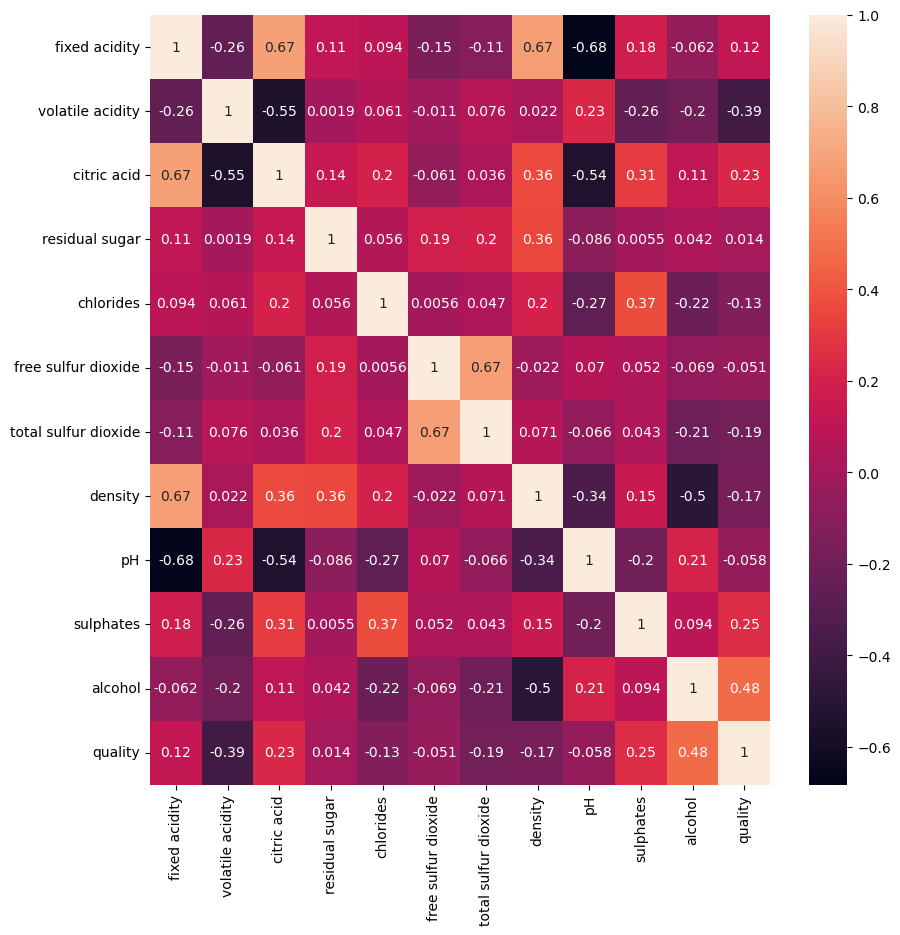

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Based on the above heatmap. I would say that the below features are important as they are highly positively or negatively co related to each other

1.fixed acidity	
2.volatile acidity	
3.citric acid
4.suplates
5.alcohol.

These are just a few attributes but to be more accurate, i think all of the attributes in the wine quality dataset are important in predicting wine quality. Each attribute contributes to a different aspect of the wine, such as its taste, body, and stability. By analyzing these attributes and their relationships to wine quality, we can develop models that accurately predict the quality of wine based on its characteristics.

In [ ]:
Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the dataset. 
If there is missing value, I can use imputing method like:

mean, median to fill the continuous feature and mode to fill the discrete features.
Imputer algorithms from sklearn library like SimpleImputer, KNNImputer.
I have used mean imputation technique to handle the missing data in the wine dataset.

The advantages and disadvantages of some imputation techniques are stated below:

Mean imputation:
Mean imputation involves replacing missing values with the mean value of the variable. This technique is simple and easy to implement. However, mean imputation may lead to biased estimates if the missing data are not missing at random. Mean imputation also reduces the variance of the variable, which may lead to underestimation of the standard errors and confidence intervals.

Median imputation:
Median imputation involves replacing missing values with the median value of the variable. This technique is also simple and easy to implement. Median imputation is more robust to outliers than mean imputation, and it does not change the variance of the variable. However, like mean imputation, median imputation may lead to biased estimates if the missing data are not missing at random.

K-nearest neighbor imputation:
K-nearest neighbor imputation involves replacing missing values with values from the K most similar cases in the dataset. This technique is more sophisticated than mean or median imputation and may produce more accurate estimates. K-nearest neighbor imputation also preserves the distribution of the variable and does not reduce the variance. However, k-nearest neighbor imputation may not be feasible if there are many missing values or if there are no similar cases in the dataset. The performance of this technique also depends on the choice of the K value.

In [ ]:
Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

In [13]:
df = pd.read_csv('stud.csv')

In [16]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df['avg']=(df['math_score'] + df['reading_score'] + df['writing_score'])/3

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


C:\Users\rajmr\AppData\Local\Temp\ipykernel_17388\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

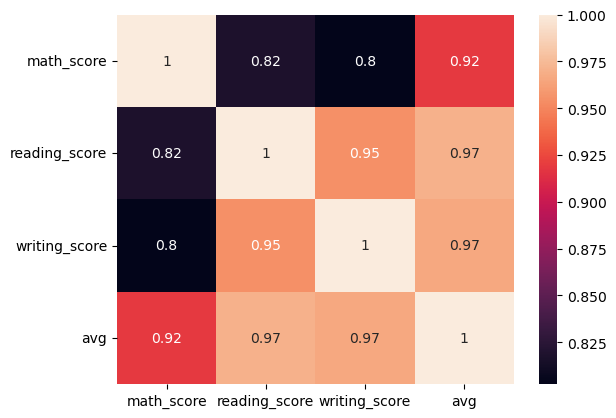

In [21]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='avg', ylabel='Count'>

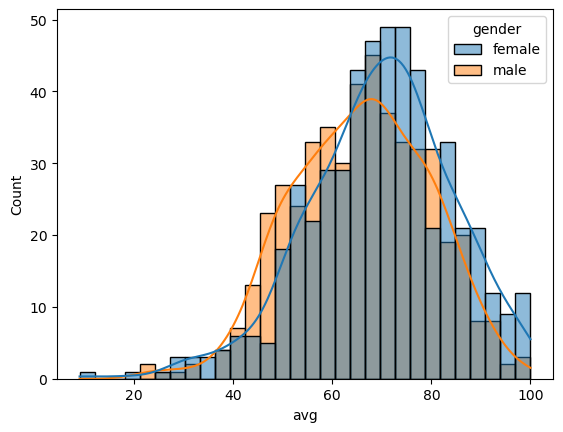

In [24]:
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='gender')

<Axes: xlabel='avg', ylabel='Count'>

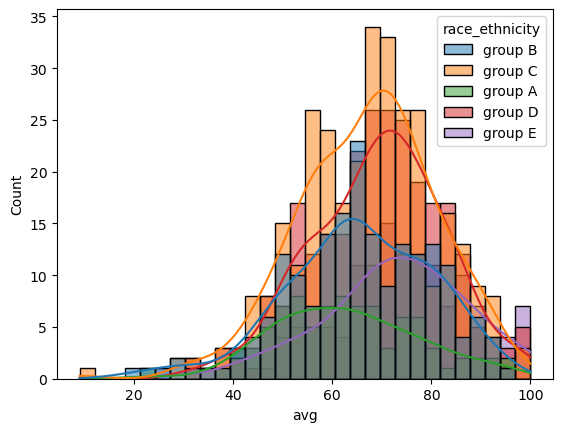

In [25]:
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='race_ethnicity')

<Axes: xlabel='avg', ylabel='Count'>

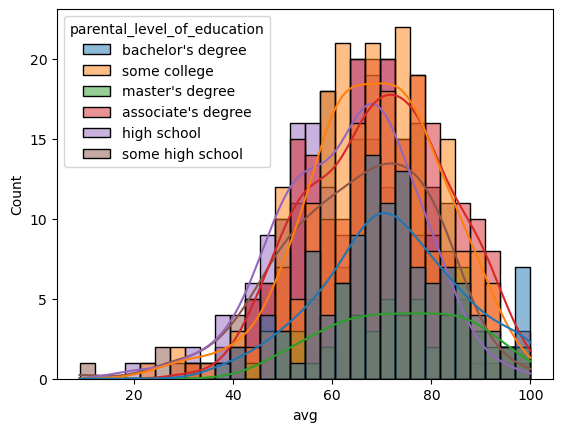

In [26]:
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='parental_level_of_education')

<Axes: xlabel='avg', ylabel='Count'>

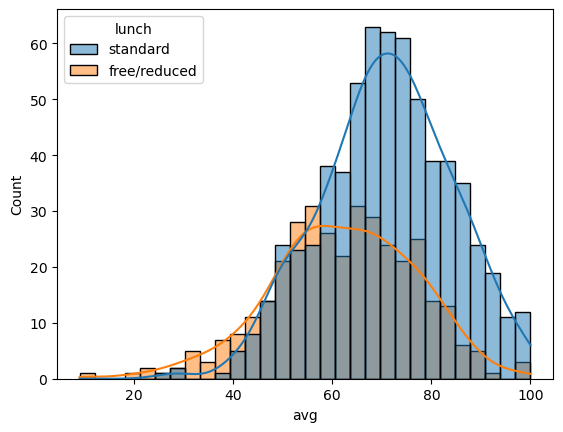

In [27]:
sns.histplot(data=df,x='avg',bins=30,kde=True,hue='lunch')

<Axes: xlabel='avg', ylabel='Count'>

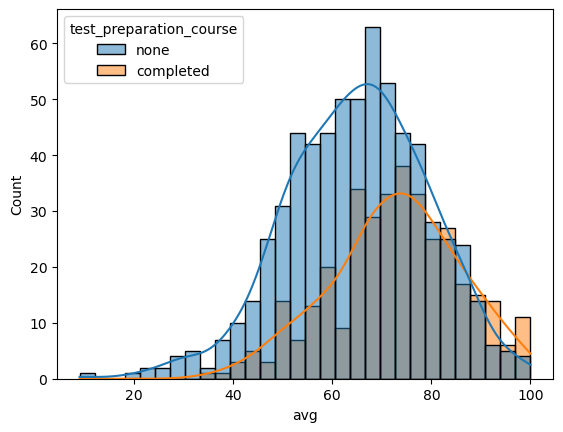

In [29]:

sns.histplot(data=df,x='avg',bins=30,kde=True,hue='test_preparation_course')

Looking into the above histogram seems that the below features are required for student performance
1.gender
2.race_ethnicity
3.parental_level_of_education
4.lunch
5.test_preparation_course

In [ ]:
Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

In [32]:
df.dtypes

gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
avg                            float64
dtype: object

In [33]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encoder = OneHotEncoder()
pd.DataFrame(encoder.fit_transform(df[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]).toarray(),columns=encoder.get_feature_names_out())


,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
So I have used one hot encoder to transform the dataset

In [ ]:
Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

In [42]:
df = pd.read_csv("winequality-red.csv")

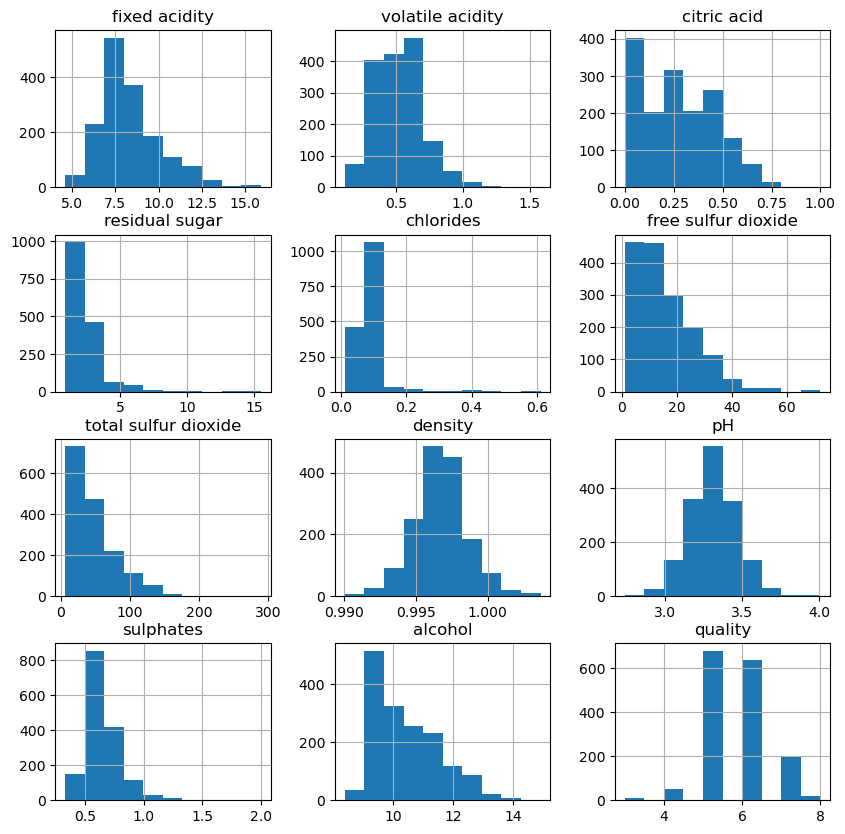

In [43]:
df.hist(figsize=(10,10))
plt.show()

from the histogram we can see that below are not having normal distribution.
'fixed acidity'
'volatile acidity'
'citric acid'
'residual sugar'
'chlorides'
'free sulfur dioxide'
'total sulfur dioxide'
'sulphates'
'alcohol'


To improve normality, we can apply various transformations to these features. Here are some possible transformations:

Log transformation: This can be applied to features with right-skewed distributions, such as residual sugar, free sulfur dioxide, and total sulfur dioxide. The log transformation can help reduce the effect of extreme values and make the distribution more symmetric.
Square root transformation: This can be applied to features with highly skewed distributions, such as volatile acidity and citric acid. The square root transformation can help reduce the skewness and make the distribution more bell-shaped.

In [ ]:
Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_data_std = scaler.fit_transform(df)

In [49]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(wine_data_std)

PCA()

In [52]:
k = 1
top_principal_components = pca.components_[:k]

In [53]:
top_principal_components

array([[ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
        -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
        -0.07317678,  0.11248878]])

In [55]:
data_feature_extracted = wine_data_std.dot(top_principal_components.T)

In [56]:
data_feature_extracted

array([[-1.77944158],
       [-1.00418467],
       [-0.91578319],
       ...,
       [-1.36626511],
       [-2.36714672],
       [-0.28877628]])

In [60]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load and preprocess the wine quality dataset
# ... (load your data here)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed for 90% variance explained
num_components_90 = np.argmax(cumulative_explained_variance >= 0.9) + 1

# Fit PCA again with the selected number of components
pca = PCA(n_components=num_components_90)
principal_components = pca.fit_transform(scaled_data)

print("Number of components needed for 90% variance:", num_components_90)
print("Principal components (first few rows):")
print(principal_components[:5, :])  # Print the first few rows of principal components


Number of components needed for 90% variance: 8
Principal components (first few rows):
[[-1.77944158  1.15730315 -1.38658056 -0.04494414  0.23388451 -0.97698268
  -0.11052758  0.04031995]
 [-1.00418467  2.07183784  0.00775877  0.46611937  0.18245388  0.65777472
  -1.37678974 -0.17671393]
 [-0.91578319  1.3934342  -0.69928641  0.34529231  0.0952097   0.25482297
  -0.72033805 -0.08868663]
 [ 2.40407712 -0.21379157  0.06638074 -0.88918202 -1.52474203 -0.13221783
   0.20066024 -0.20281558]
 [-1.77944158  1.15730315 -1.38658056 -0.04494414  0.23388451 -0.97698268
  -0.11052758  0.04031995]]
